In [259]:
# Initialize Otter
import otter
grader = otter.Notebook("hw9.ipynb")

# Homework 9: Predictive Modelling and Model Comparision

Name: Colin Jette and Ritika Tejwani

Student ID: 498446 and 498283

Collaborators: NA


## Instructions

This is the final homework/Project, which is about Understanding Data Profiling, Feature Engineering, Feature Selection, Model Comparision & Selection as a _final project_ for our 217a class.

We will be using the techniques and approaches introduced throughout the course focusing mainly towards the second half of the semester:

* [M0] Python for DS
* [M1] The DS and ML Workflows
* [M2] Exploratory Data Analsyis
* **[M3] Linear Regression (if applicable - depends on problem/dataset)**
* **[M4] Linear Classification (if applicable - depends on problem/dataset)**
* [M5] Sentiment Analysis (if applicable - depends on problem/dataset)
* [M6] Learning Principles and Ethical Thinking for DS
* **[M7] Clustering K-Means (if applicable - depends on problem/dataset)** 
* **[M8] Similarity-based Learning K-NN (if applicable - depends on problem/dataset)**
* **[M9] More Models (Decision Tree, Random Forest, Neural Network) for Feature Engineering & Model Comparision & Selection**
* **[M10] Creating & Managing Model pipeline for ML workflow**

The main focus of this project is majorly on the last modules [M3]-[M10]. In particular, it will be helpful to review **Lab 3 & hw 3 onwards for more clarification**.
Most of the things you will do in this final project are explained in `Lab9` and `Lab 10`. Then, review the other labs and hws to recap the general workflow of our DS approaches to the various problems we have worked on so far. This will help you to be prepared for all the steps in this project, so that you do not miss anything. 

In gernal, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend).

Additionally, note that this assignment is more like a project than a typical homework and it will have a slightly different structure than the hws in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the DS workflow and you will need to fill in the analysis and structure as you go.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. 

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

In [260]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'my answer'

### Submission instructions
* Submit this Python notebook, including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

<!-- BEGIN QUESTION -->

## 1. Introduction

For our final project this semester, we'll take a look at data for California Housing Price Prediction
https://www.kaggle.com/subashdump/california-housing-price-prediction/data 


As you have seen throughout the semseter we have learned various techniques to solve a problem task (Classification, Regression, Clustering etc.) starting from problem formulation to EDA to model building to model evaluation and performing feaure engineering and selection in order to improve the model's performance.
You will be combining all the knowledge learned so far in this final project. You will be making assuptions and decisions on your own with appropriate justifications in writeups about how to improve the prediction model using all the tools and techniques learned so far and provide the best model at the end.


The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Our goal will be to use this dataset to gain some insight about characteristics of different features.
We will be using data profiling from pandas and create models (hopefully more than 3) and complare them to find out which model performed the best and probably explain why it is the best model among all in this data.


In [261]:
#Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Problem 1.1

Download the data and load it in this notebook for further processing and analysis.

**Write-up!** Describe the data, answering questions including, but not limited to, these: Where does the data come from? How was it obtained? How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take? what kind of relationship you would explore in this dataset and on what features? 
> **Hint**: Consider the steps of EDA; what would you like to know about this dataset. 

In [262]:
# BEGIN SOLUTION
data = pd.read_csv("utility/data/housing.csv")
# END SOLUTION

In [263]:
data.shape

(20640, 10)

In [264]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [265]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [267]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Problem 1.1:** <br>
The data comes from the Kaggle which is a data science company that contains data sets on a variety of topics. This specific data is about houses in a given California district, and gives the summary stats about them based on the 1990 census data. This data set has 20640 data points and 10 features per data point. The features in the data set are longitude, latitude, housing median age, total rooms, total bedrooms, population, households, median income, median house value, and ocean proximity. All the features beside ocean_proximity are continuous numerical variables. Ocean_proximity is a categorical variable because it's represented by a string. Since this data set is about predicting house prices, I would want to explore what features have the most correlation with the median house value, and what features have the most accuracy in predicting house prices.

### Problem 1.2
### Getting Familiar with the Data

Install the pandas data profile dependencies and import them to generate the data report using __df.profile_report__. 


**Write-up!** What is the Domain/Area of this dataset and what kind of prediction (regression, classification or clustering) we are doing with this dataset and why? Describe the additional insights (if any) you get from generating the pandas data profile report, which you did not observe in the previous EDA steps. Does it change your thinking process or provide any ideas about data pre-processing or processing steps? 

In [268]:
# BEGIN SOLUTION
!pip install pandas-profiling==3.5.0
# END SOLUTION

In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

**Problem 1.2** <br>
The domain of this dataset is housing prices in different California districts. We want to make regressional predictions with this data set because we're dealing with mostly numerical values, and we want to predict another numerical value by fitting a model with the necessary data to train in. From the profile report, it says that there are a total 207 missing cells, all from the total_bedrooms feature. This is important because since there are missing cells, we must clean the data to get rid of the missing cells so it doesn't skew the regressional model. From the ocean_proximity, I see that the column has 5 distinct values, so maybe there's a way to numerically categorize those 5 distinct values so I can numerically analyze them. We can also see from the profile report that median income has the highest correlation with house value.

### Problem 1.3: Data Description and Pre-processing

**Write-up!** What are the major highlights and interesting points in the report generated in the previous cell (or your own EDA process). 
Describe your insights and thought process regarding those insightful aspects of the data/features/graph/statistics in terms of general relationship among features such as correlation, interaction, cardinality, distribution, missing data, outliers etc.


In [ ]:
data

**Problem 1.3** <br>
From the correlation matrix, I can see that median house value is highly correlated to median income, so I might want to explore how accurate the income is in predicting the house value. Additionally, from before, the ocean_proximit has 5 distinct values, so maybe there's some way to incorporate the ocean_size data into the regressional mdoel to see if the house value has any correlation with its nearest distance to an ocean. Based solely on outliers, from the pandas profile report, I can see that house median age and median house value have outliers, which might skew the regressional model accuracy. All of the 207 missing values are from the total_bedrooms column.

In [ ]:
data = data.replace("<1H OCEAN", 1).replace("INLAND", 2).replace("NEAR OCEAN", 3).replace("NEAR BAY", 4).replace("ISLAND", 5)

To initially pre-process the data, we want to convert the categorical variable ocean_proximity to a numerical variable, which is what the code above does. The updated column is shown below:

In [ ]:
data['ocean_proximity']

### Problem 1.4: Split the Data (you will be using the same data split (train-validation-test) for all the models in the following questions )

Extract input (X) and output (y) data from the dataset. 

Use the train and test split and k-fold cross validation (use 5 fold cross validation) from the scikit learn library to split the data into 80% training and 20% testing.

**NOTE** Remember that you will be using the same cross validation and train test splits values for all the predictive modeling part (Problem 3) for the fair comparision at the end. 

**Write-up!** Why 80% train and 20% test split is considered a good practice? How would you pick the train-test split size if the dataset is relatively small or large? What is the purpose of using cross validation technique and how does it ensure model robustness? What is Data snooping and how do you avaoid it?

**Problem 1.4:** <br>
Studies show that the most accurate results are obtained if we use 20% of the data for testing and the remaining 80% of the data for training. Also, according to the 80/20 rule of model validation, 80% of the outcomes come from 20% of the causes, so using 20% of the factors will produce the best results. 
If the dataset is relatively small, we would want to increase the amount of testing data and make the train-test split 70/30. However for large datasets, we have an abundance of testing data with 20% of the data, so we would want to significantly decrease this to almost a 99/1 ratio. 
The purpose of cross validation is to estimate the performance of a specific model on untrained data by using a limited sample validation data. 
Cross validation ensures model robustness because it minimizes underfitting and overfitting so that the model's performance won't significantly change when using tseting data vs training data.
Data snooping is the insertion of bias/misuse in data statistical analysis to artificially prove statistically significant results that may be highly inaccurate.
To avoid data snooping, you want to use all the data and not remove important features to minimize bias from the data in order to get statistically significant results

In [ ]:
# BEGIN SOLUTION
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

data_new = data.drop_duplicates()
data_new = data.dropna()

X = np.float64(data_new.copy().drop(['median_house_value', 'ocean_proximity'], axis=1))
y = np.float64(data_new.copy().drop(['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'median_income', 
           'ocean_proximity'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

kf = KFold(n_splits = 5, shuffle = True, random_state = None)

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print("Fold", fold, ":")
    print("Train index: ", train_index)
    print("Test index: ", test_index)

# END SOLUTION

### Problem 1.5: Perform Linear Regression

Let's create a baseline model here:

Perform Linear Regression on training data. Predict the output for the test dataset using the fitted model. Print the root mean squared error (RMSE) and R^2 value from Linear Regression for test data set.



**Write-up!** Why do we use R^2 values when we have other error measures (MAE, MSE, RMSE etc.)?

**Problem 1.5:** <br>
We use R^2 values because they tell us how well the predictor variables can explain the variation in the response variable. Additionally, we use R^2 values because R^2 values are standardized, and therefore we're able to easily compare the accuracy of models since R^2 values aren't differentiated by the scalar effects of the data.

In [ ]:
# BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

r_squared_array = np.zeros(5)
rmse_array = np.zeros(5)

kf = KFold(n_splits = 5, shuffle=True, random_state = None)
    
for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]

    model = LinearRegression()
    model = model.fit(X_train,y_train)
    r_squared = model.score(X_test,y_test)
    r_squared_array[fold] = r_squared
    
    mse = mean_squared_error(y_test, model.predict(X_test))
    rmse = np.sqrt(mse)
    rmse_array[fold] = rmse
    
    
print("R-squared:", np.mean(r_squared_array))
print("RMSE:", np.mean(rmse_array))

# END SOLUTION

## 2. Feature Engineering

### Problem 2.1 

Identify features which needs feature engineering after looking at the baseline model's result. Perform Feature Tranformation/Manipulation/Engineering in this step and use this knowledge in predictive modeling part. 

Apply some feature generation technices in order to make those features more useful for the data such as checking the datatypes, handling missing values, extracting new features from existing ones, encoding some features if categorical, scaling, standardization etc. 

**Write up!** Explain your reasoning for selecting features and performing those specific feature engineering steps respectively.

**Do this!** In the cells below, **explain** and perform the steps that you need to prepare this data for further analysis. Make sure that your implementations and write-ups (for processing and analysis) are presented well and effectively describe your workflow. You may add comments or markdown cells for your documentation as you see fit!  

*Grading Note: Your work will be graded for _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report.*

> **Hint**: You can use our previous labs as examples of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

To initially preprocess the data, we needed to drop the na values by imputing the na values with the mean of each column. As seen below, all 207 null values are in the total_bedrooms column, so we find the mean of the total_bedrooms column and then fill the null values with this mean.

In [ ]:
data.isnull().sum()

In [ ]:
mean_value= np.mean(data['total_bedrooms'])
data['total_bedrooms'].fillna(value=mean_value, inplace=True)

In [ ]:
data.dtypes

In the cell below, we set the X as all the columns besides median house value, and we set y, the target, as median_house_value. Then we train test split the data into an 80-20 ratio of training vs testing data. We also additionally convert the categorical column ocean_proximity to numerical values.

In [ ]:
data = data.replace("<1H OCEAN", 1).replace("INLAND", 2).replace("NEAR OCEAN", 3).replace("NEAR BAY", 4).replace("ISLAND", 5)
data['ocean_proximity'] = data['ocean_proximity']*1.0

X = data.loc[:, data.columns != 'median_house_value']
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


### Problem 2.2: Perform Basic Feature Manupilation & Data Transformation

1. Be consistent with the feature engineering process in train and test data. No data snooping.
2. Handle Missing data: Fill the missing values with the mean of the respective column.
3. Encode categorical data: Convert categorical column in the dataset to numerical data.
4. Standardize data: Standardize training and test datasets.

### Problem 2.3: Perform Feature Engineering (Feature Selection or/and Feature Generation) including but not limited to statistical, ML based, Newly extracted/created features etc. wherever appropriate/applicable in the respective Predictive Modeling part.


In the cell below, we scale the training and testing data using the function preprocessing.scale which standardizes/normalizes the data. It's important we do this after the train test split because this prevents data snooping.

In [217]:
# BEGIN SOLUTION

from sklearn import preprocessing

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)
y_train = preprocessing.scale(y_train)
y_test = preprocessing.scale(y_test)

# END SOLUTION

## 3. Predictive Modeling [Using scikit learn pipeline is highly encouraged]

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

1. Build a model of housing prices to predict median house values in California using the provided dataset.
2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.
3. Predict housing prices based on median_income and plot the regression chart for it.

### Problem 3.1 : Perform K-Nearest Neighbors Regression

Perform K-Nearest Neighbors Algorithm for Regression on the training data.

Predict output for the test dataset using the fitted model.

Print root mean squared error (RMSE) and R^2 from K-Nearest Neighbors Regression on the test datset.

**Write-up!** How K-NN is different than Linear regression model and what additional steps you have to take for KNN Regression?

**Answer here:** <br>
K-NN is a classification model and Linear regression is a a regressional model. K-NN assumes that similar things exist in close proximity to each other. Therefore, K-NN computes distances of different data points to a certain amount of neighbors or clusters. Then, it takes the minimum distance and classifies that data point as part of that cluster, thus making it a classification problem. On the other hand, the Linear regressional model computes the least squares to fit a best line to model, then calculates the accuracy by calculating the distance from each data point to the best fit line.
The difference between KNN regression and K-NN classification. is that KNN regression attempts to predict the value of the target by using the average whereas KNN classification attempts to predict the class/cluster that the target belongs to by maximizing the probability likelihood function.
Therefore, an additional step for KNN regression is computing the local average of the data points to create a prediction model for the testing data.

In [218]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
np.random.seed(42)

In [219]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

num_cols = ['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'median_income', 
            'median_house_value','ocean_proximity']

num_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('robust scaler', RobustScaler())
])

In [220]:
from sklearn.neighbors import KNeighborsRegressor
pipeline_kNN = Pipeline(steps=[('preprocessor', num_transformer),
                      ('regressor', KNeighborsRegressor())])

In [221]:
from sklearn.model_selection import cross_val_score

r2_kNN = cross_val_score(pipeline_kNN, X_train, y_train, cv=5, scoring='r2').mean()
print("r-squared:", r2_kNN)

rmse_kNN = -1*cross_val_score(pipeline_kNN, X_train, y_train, cv=5, scoring ='neg_root_mean_squared_error').mean()
print("rmse:", rmse_kNN)

r-squared: 0.7107447419512194
rmse: 0.5376849113155902


### Problem 3.2 : Perform Decision Tree Regression 
Perform Decision Tree Regression on the training data.

Predict the output for test dataset using the fitted model.

Print root mean squared error (RMSE) and R^2 from Decision Tree Regression on the test dataset.

**Write-up!** What are the advantages or disadvantages of using Decision Tree over Linear regression and KNN?

**Answer here:** <br>
Decision tree is a type of supervised machine learning that splits data based on previous sets of questions to divide the data into regressions or clusters.
The advantages of using decision trees are there's less data preparation, non-linearity, and greater interpretability of the data given that the splits can be any arbitrary quantity. The disadvantages of using decision trees are overfitting, there's no feature reduction, and not necessarily linearity.

In [222]:
# BEGIN SOLUTION
from sklearn.tree import DecisionTreeRegressor
pipeline_DT = Pipeline(steps=[('preprocessor', num_transformer),
                      ('regressor', DecisionTreeRegressor())])

# END SOLUTION

In [223]:
from sklearn.model_selection import cross_val_score

r2_dt = cross_val_score(pipeline_DT, X_train, y_train, cv=5, scoring='r2').mean()
print("r-squared:", r2_dt)

rmse_dt = -1*cross_val_score(pipeline_DT, X_train, y_train, cv=5, scoring ='neg_root_mean_squared_error').mean()
print("rmse:", rmse_dt)

r-squared: 0.6410274872607599
rmse: 0.5971669359679141


### Problem 3.3 : Perform Random Forest Regression :
Perform Random Forest Regression on the training data.

Predict the output for test dataset using the fitted model.

Print root mean squared error (RMSE) and R^2 from Random Forest Regression on the test dataset.

**Write-up!** How Random Forest ensures better results from Decision Tree and Why? 

**Answer here:** <br>
Random Forest ensures better results than Decision tree because random forest repetitively selects a subset of features and makes a unique decision tree from that subset of features. In the end, it averages the results observed from the whole set of decision trees it created, therefore giving it better results from Decision Tree because it contains some sort of feature reduction.

In [224]:
# BEGIN SOLUTION
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

pipeline_RF = Pipeline(steps=[('preprocessor', num_transformer),
                      ('regressor', RandomForestRegressor(random_state=5))])

# END SOLUTION

In [225]:
from sklearn.model_selection import cross_val_score

r2_rf = cross_val_score(pipeline_DT, X_train, y_train, cv=5, scoring='r2').mean()
print("r-squared:", r2_rf)

rmse_rf = -1*cross_val_score(pipeline_DT, X_train, y_train, cv=5, scoring ='neg_root_mean_squared_error').mean()
print("rmse:", rmse_rf)

r-squared: 0.6411463284214433
rmse: 0.600001354686835


### Problem 3.4: Perform Linear Regression with one independent variable

Extract just the median_income column from the independent variables (from X_train and X_test).

Perform Linear Regression to predict housing values based on median_income.

Predict output for test dataset using the fitted model.

Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

Compare the results of the baseline model with this model's result.

**Write-up!** Why there is a difference in performance (if any!) of problem 1.5 and problem 3.4 model? What kind of feature selection is being applied here and what is the intuition behind it. Describe in your words! 

**Answer here:** <br>
There's a difference in performance because we used a pipeline for this one instead of hand computing it. Therefore, the pipeline does different computations based on statistical and probabilistic algorithms. The kind of feature selection being applied here is used to select the feature's importance from a model so it can be used to train another model. Therefore, since we weigh the feature's performance/importance, the r2 and rmse values are different.

In [226]:
# BEGIN SOLUTION
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

pipeline_LR = Pipeline(steps=[('preprocessor', num_transformer),
                      ('regressor', LinearRegression())])

# END SOLUTION

In [227]:
r2_lr = cross_val_score(pipeline_LR, X_train, y_train, cv=5, scoring='r2').mean()
print("r-squared:", r2_lr)

rmse_lr = -1*cross_val_score(pipeline_LR, X_train, y_train, cv=5, scoring ='neg_root_mean_squared_error').mean()
print("rmse:", rmse_lr)

r-squared: 0.6316258235284089
rmse: 0.606743301657892


## 4. Model Comparision

### Problem 4.1:

Compare all the models results and report the lowest accuracy score.

Visualize all the final models error using R^2 in a bar graph.


Text(0.5, 1.0, 'Accuracy Scores for Final Models')

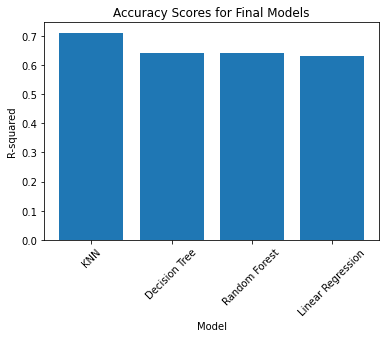

In [228]:
# BEGIN SOLUTION
    
labels = ['KNN', 'Decision Tree', 'Random Forest', 'Linear Regression']
scores = [r2_kNN, r2_dt, r2_rf, r2_lr]

# your code here 
plt.bar(labels,scores)
plt.xticks(rotation = 45)
plt.xlabel("Model")
plt.ylabel("R-squared")
plt.title("Accuracy Scores for Final Models")

# END SOLUTION

As seen above, the linear regression model has the lowest accuracy score compared to the other models. Its r-squared value is 0.632.

Text(0.5, 1.0, 'RMSE Scores for Final Models')

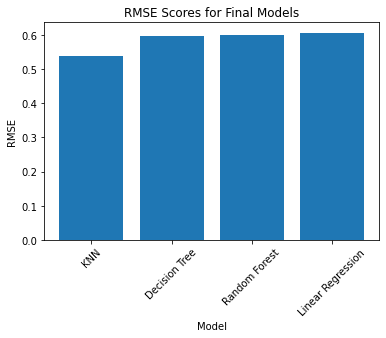

In [229]:
labels = ['KNN', 'Decision Tree', 'Random Forest', 'Linear Regression']
scores = [rmse_kNN, rmse_dt, rmse_rf, rmse_lr]

# your code here 
plt.bar(labels,scores)
plt.xticks(rotation = 45)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("RMSE Scores for Final Models")

As seen above, the k nearest neighbors has the lowest rmse score compared to the other models. Its r-squared value is 0.632. It has a RMSE value of 0.537.

### Problem 4.2:

Now review the feature enginnering lab (lab 9) and apply one of the feature selection and/or one feature generation method and use it for prediction on the test data. Evaluate and compare the all the models (LR, DT, RF, K-NN) on original features (no feature engineering) with the ones on the engineered features.
Then, select the best model after the whole comparision.

Visualize the following models with and without feature engineering comparision.
1.  Linear Regression Model (LR-all (Problem 1.5) vs LR-1feature (Problem 3.4).
2.  KNN (No feature engineering KNN vs Feature engineered KNN)
3.  DT (No feature engineering DT vs Feature engineered DT)
4.  RF (No feature engineering RF vs Feature engineered RF)

Visualize all models with feature enginnering in one graph and compare their R^2.

**Write up** Explain which feature selection and/or feature generation method have you selected and why for this dataset.

**Answer here:** <br>
For this data set I chose to do random forest because it has the highest r-squared value with feature engineering, so it would be the most interesting to see how the feature engineered random forest compares to the no feature engineering random forest in terms of accuracy in the model.

In [235]:
# BEGIN SOLUTION
data_FE = data.drop(['longitude', 'latitude'], axis =1)
# END SOLUTION

In [239]:
X_train_FE, X_test_FE, y_train_FE, y_test_FE = train_test_split(X, y, test_size=0.2, random_state=5)
X_train_FE = preprocessing.scale(X_train_FE)
X_test_FE = preprocessing.scale(X_test_FE)
y_train_FE = preprocessing.scale(y_train_FE)
y_test_FE = preprocessing.scale(y_test_FE)

num_cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'median_income', 
            'median_house_value','ocean_proximity']

num_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('robust scaler', RobustScaler())
])

In [241]:
from sklearn.neighbors import KNeighborsRegressor
pipeline_kNN_FE = Pipeline(steps=[('preprocessor', num_transformer),
                      ('regressor', KNeighborsRegressor())])
r2_kNN_FE = cross_val_score(pipeline_kNN, X_train_FE, y_train_FE, cv=5, scoring='r2').mean()
print("r-squared:", r2_kNN_FE)

rmse_kNN_FE = -1*cross_val_score(pipeline_kNN_FE, X_train_FE, y_train_FE, cv=5, scoring ='neg_root_mean_squared_error').mean()
print("rmse:", rmse_kNN_FE)

r-squared: 0.7107447419512194
rmse: 0.5376849113155902


In [242]:
from sklearn.tree import DecisionTreeRegressor
pipeline_DT_FE = Pipeline(steps=[('preprocessor', num_transformer),
                      ('regressor', DecisionTreeRegressor())])
from sklearn.model_selection import cross_val_score

r2_dt_FE = cross_val_score(pipeline_DT_FE, X_train_FE, y_train_FE, cv=5, scoring='r2').mean()
print("r-squared:", r2_dt_FE)

rmse_dt_FE = -1*cross_val_score(pipeline_DT_FE, X_train_FE, y_train_FE, cv=5, scoring ='neg_root_mean_squared_error').mean()
print("rmse:", rmse_dt_FE)

r-squared: 0.6400660411566245
rmse: 0.6021365086895927


In [243]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

pipeline_RF_FE = Pipeline(steps=[('preprocessor', num_transformer),
                      ('regressor', RandomForestRegressor(random_state=5))])
from sklearn.model_selection import cross_val_score

r2_rf_FE = cross_val_score(pipeline_DT_FE, X_train_FE, y_train_FE, cv=5, scoring='r2').mean()
print("r-squared:", r2_rf_FE)

rmse_rf_FE = -1*cross_val_score(pipeline_DT_FE, X_train_FE, y_train_FE, cv=5, scoring ='neg_root_mean_squared_error').mean()
print("rmse:", rmse_rf_FE)


r-squared: 0.6422407201357461
rmse: 0.603917747754286


In [245]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

pipeline_LR_FE = Pipeline(steps=[('preprocessor', num_transformer),
                      ('regressor', LinearRegression())])
r2_lr_FE = cross_val_score(pipeline_LR, X_train_FE, y_train_FE, cv=5, scoring='r2').mean()
print("r-squared:", r2_lr_FE)

rmse_lr_FE = -1*cross_val_score(pipeline_LR_FE, X_train_FE, y_train_FE, cv=5, scoring ='neg_root_mean_squared_error').mean()
print("rmse:", rmse_lr_FE)

r-squared: 0.6316258235284089
rmse: 0.606743301657892


               Model     No FE        FE
0                KNN  0.710745  0.710745
1      Decision Tree  0.641027  0.640066
2      Random Forest  0.641146  0.642241
3  Linear Regression  0.631626  0.631626


<AxesSubplot:title={'center':'Feature Engineering vs No Feature Engineering'}, xlabel='Model'>

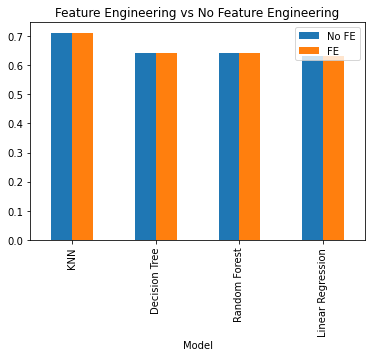

In [257]:
labels = ['KNN', 'Decision Tree', 'Random Forest', 'Linear Regression']
scores = [r2_kNN, r2_dt, r2_rf, r2_lr]
scores_FE = [r2_kNN_FE, r2_dt_FE, r2_rf_FE, r2_lr_FE]

df = pd.DataFrame([['KNN', r2_kNN, r2_kNN_FE], ['Decision Tree', r2_dt, r2_dt_FE], ['Random Forest', r2_rf, r2_rf_FE],
                   ['Linear Regression', r2_lr, r2_lr_FE]],
                  columns=['Model', 'No FE', 'FE'])
print(df)
  
# plot grouped bar chart
df.plot(x='Model',
        kind='bar',
        stacked=False,
        title='Feature Engineering vs No Feature Engineering')


**Write up** Summarize your results and provide some crucial insights about the entire with and without feature engineering process such as which model performed the best and why, based on what metrics and indicators, etc. Which feature engireeing step provided more value to the predictive modeling process?


**Answer here:** <br>
As seen above, our feature engineering is marginally better than the no feature engineering data set because we extracted non important features like longitude and latitude since they're not relevant to house prices. The feature engineering for k neighbors has the highest r2 value, so we should use this model for the data set in predicting house prices. 

In [258]:
grader.check("hw9")

hw9 results: All test cases passed!

<!-- END QUESTION -->

Note that we have a dummy test here to generate a pdf on Gradescope, but the entire assignment is manually graded. So make sure your notebook communicates your thoughts and process!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)